<a href="https://colab.research.google.com/github/zinebzannouti/Web-Scraping/blob/main/4_Scrape_Car_Attributs_Using_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scrape Car Attributs Using Requests**





- We will scrape data from a Car dealer websites : we will extract - brand- model- fuel type- miles- model year- price

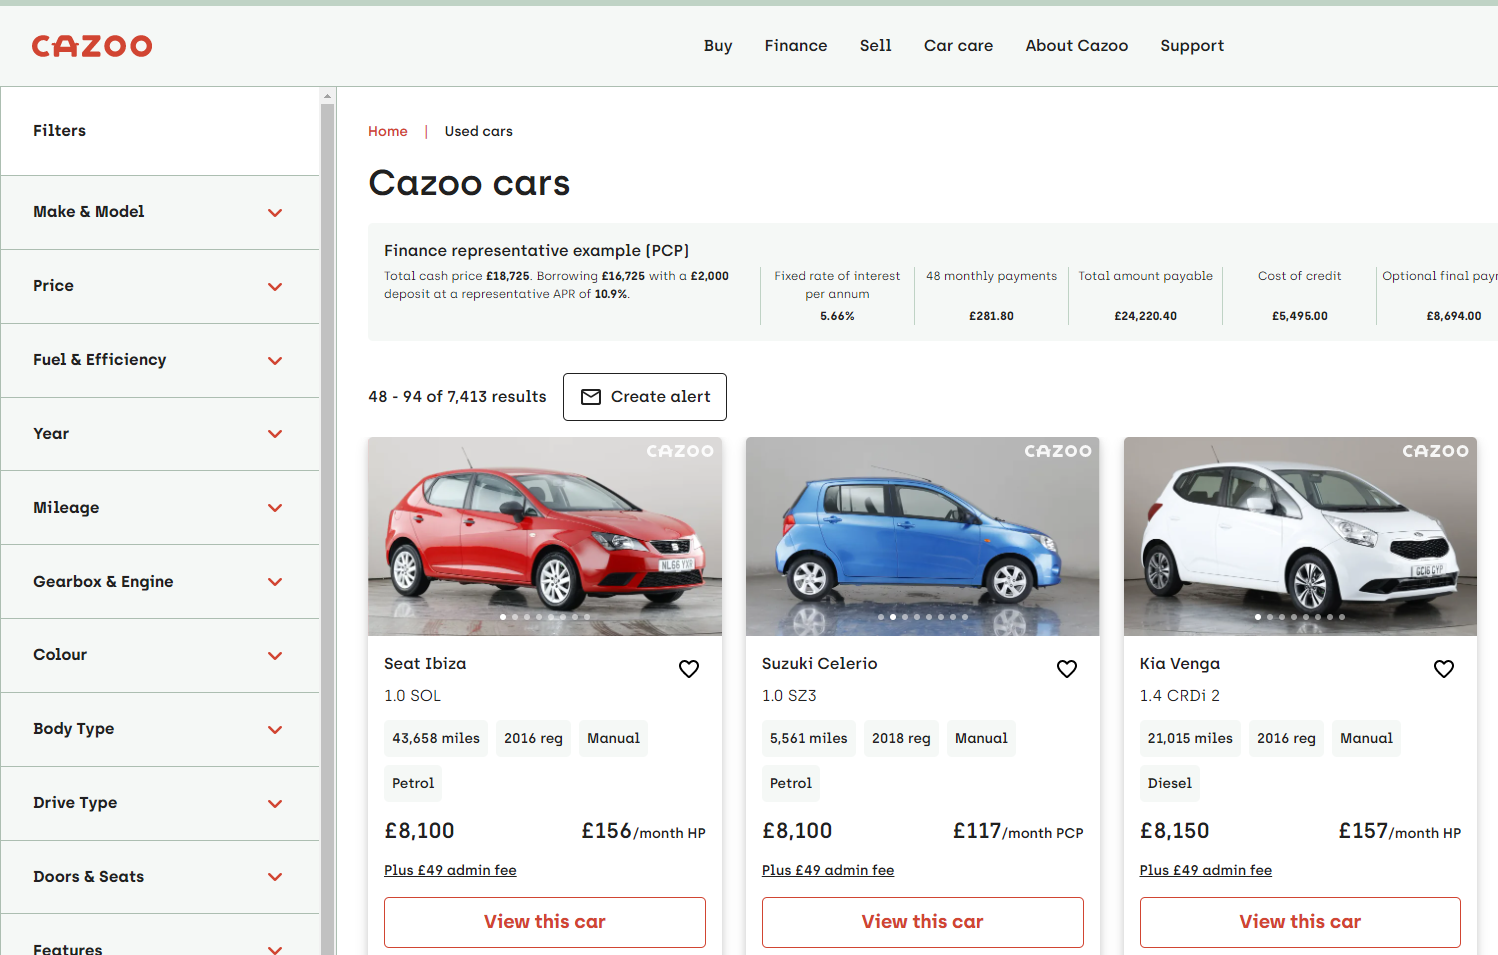

#### 1 - Imports

In [1]:
import requests 
import pandas as pd 
import sqlalchemy

#### 2 - CURL 

***How to View HTTP Headers? [Including Cookies]***

- Before we can use headers in our code, we need to be able to grab them from somewhere. To do so, let’s use our own browser and go to the target website. 
- For our example, let’s go to https://www.cazoo.co.uk/cars/?page=2 > right-click > inspect to open the developer tools.

- we’ll navigate to the Network tab and search for the query “?page 2 ”.



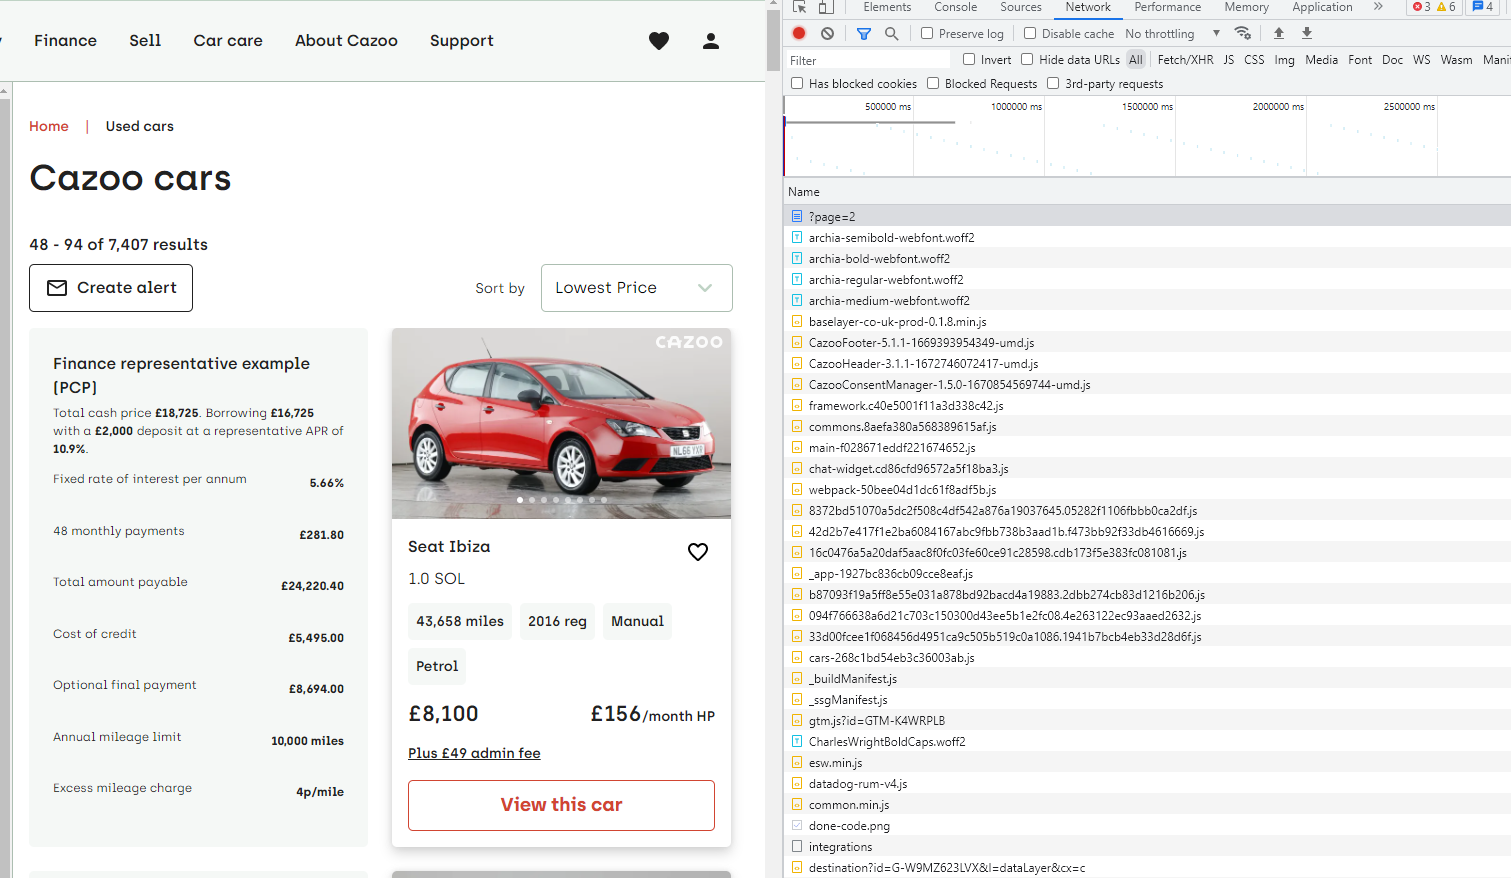

- Clicking on the file we’ll open by default the Headers tab and by scrolling down we’ll see the Request Headers section.

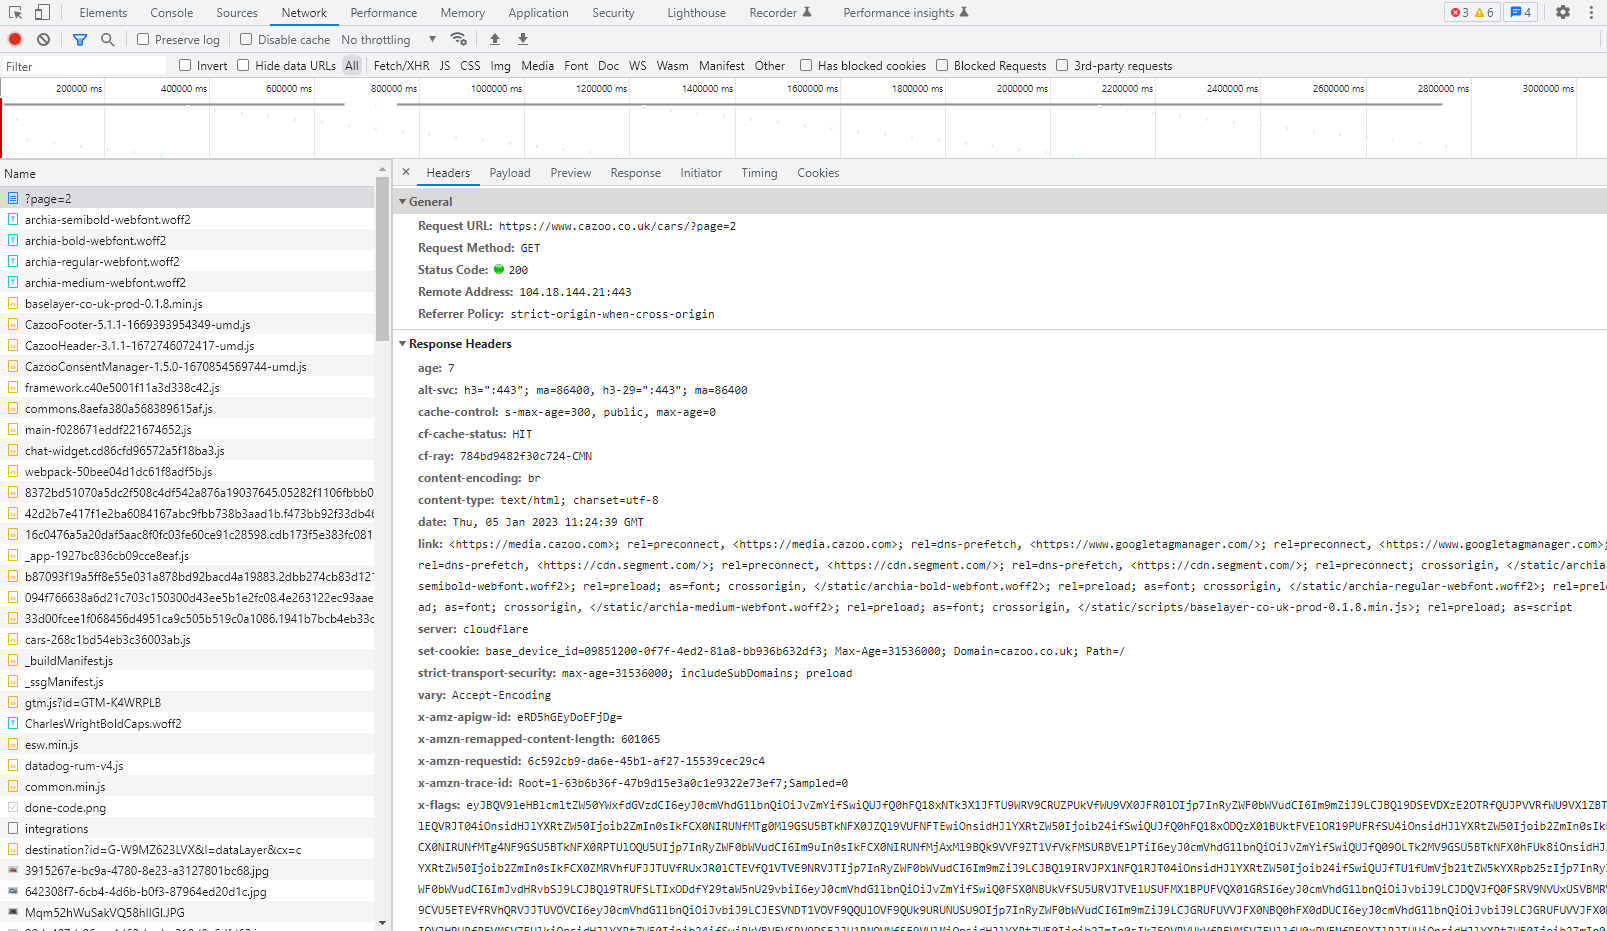

***Headers Arguments***

- **User-Agent**: This is probably the most important header as it identifies “the application type, operating system.
software vendor or software version of the requesting software user agent,” making it the first check most servers will run.

- **Accept-Language** : Although it’s not always necessary, it tells the server what language version of the data to provide. When there’s a big discrepancy between each request from a language standpoint, it could tell the server there’s a bot involved.

- **Referer** : The Referer HTTP header tells the server the page which the user comes from. Although it’s used mostly for tracking, it can also help us to mimic the behavior of an organic user by, for example, telling the server we’ve come from a search engine like Google.

- **Cookie** : We’ve already discussed what cookies are, however, we might haven’t stated clearly why are cookies important for web scraping.Cookies allow servers to communicate using a small piece of data, but what happens when the server sends a cookie but then the browser doesn’t store and send it back in the next request? Cookies can be also used to identify if the request is coming from a real user or a bot.
- **sec-fetch-site** :this header tells a server whether a request for a resource is coming from the same origin, the same site, a different site, or is a "user initiated" request. The server can then use this information to decide if the request should be allowed.
- **sec-fetch-mode** :allows a server to distinguish between: requests originating from a user navigating between HTML pages, and requests to load images and other resources. For example, this header would contain navigate for top level navigation requests, while no-cors is used for loading an image.

- **sec-fetch-Dest** : allows servers determine whether to service a request based on whether it is appropriate for how it is expected to be used.

In [2]:
headers = {
    'authority': 'www.cazoo.co.uk',
    'sec-ch-ua': '^\\^',
    'cazoo-language': 'en',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36',
    'cazoo-market': 'gb',
    'sec-ch-ua-platform': '^\\^Windows^\\^',
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.cazoo.co.uk/cars/?page=2',
    'accept-language': 'en-US,en;q=0.9,de-DE;q=0.8,de;q=0.7',
    'cookie': 'base_device_id=d0a0a3f4-6853-469a-920f-6050e04a23d0; base_session_count=1; base_session_id=aa7da8a1-20b0-44f4-b994-7b19b379af45',
}

params = (
    ('sort', 'price-asc'),
)

response = requests.get('https://www.cazoo.co.uk/api/search', headers=headers, params=params)


3 - Check Status Code

In [3]:
response

<Response [200]>

#### 4 - Create Json Object

In [ ]:
results_json = response.json()
results_json

#### 5 - Output Keys

In [5]:
results_json.keys()

dict_keys(['results', 'filters', 'pagination'])

In [6]:
listing = results_json['results']

#### 6 - Find your Data 
- brand
- model
- fuel type
- miles
- model year
- price

In [7]:
# brand
listing[0]['make']

'Peugeot'

In [8]:
# model
listing[0]['model']

'108'

In [9]:
# fuel type
listing[0]['fuelType']['description']

'Petrol'

In [10]:
#miles
listing[0]['mileage']

34207

In [11]:
# model year
listing[0]['modelYear']

2015

In [12]:
# price
listing[0]['pricing']['fullPrice']['value']

6550

####  7 - Put everything together - Loop through results and append data inside a list

In [13]:
# empty lists
brand = []
model = []
fuel_type = []
miles = []
model_year = []
price = []

for result in listing:
    
    # brand
    brand.append(result['make'])
    
    # model 
    model.append(result['model'])
    
    # fuel type
    fuel_type.append(result['fuelType']['description'])
    
    # miles
    miles.append(result['mileage'])
    
    #model year
    model_year.append(result['modelYear'])
    
    # price
    price.append(result['pricing']['fullPrice']['value'])

#### 8 - Pandas Dataframe - Single Page

In [16]:
car_df = pd.DataFrame({'Brand': brand, 'Model':model, 'Fuel Type': fuel_type, 'Mileage':miles,
                      'Model Year': model_year, 'Price':price})

In [17]:
car_df

,Brand,Model,Fuel Type,Mileage,Model Year,Price
0,Peugeot,108,Petrol,34207,2015,6550
1,Dacia,Sandero Stepway,Petrol,65547,2012,6550
2,Suzuki,Celerio,Petrol,23190,2015,6650
3,Fiat,500,Petrol,41216,2015,6850
4,Dacia,Sandero,Petrol,10837,2012,6900
5,Ford,Ka,Petrol,34980,2015,6950
6,Suzuki,Celerio,Petrol,23778,2015,7050
7,Citroen,C1,Petrol,29950,2016,7150
8,Dacia,Sandero,Petrol,30780,2017,7150
9,Toyota,AYGO,Petrol,55659,2017,7250


In [18]:
car_df.to_csv('data.csv')

#### 9 - Scraping Multiple Pages (here: 20 pages)

In [19]:
headers = {
    'authority': 'www.cazoo.co.uk',
    'sec-ch-ua': '^\\^',
    'cazoo-language': 'en',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36',
    'cazoo-market': 'gb',
    'sec-ch-ua-platform': '^\\^Windows^\\^',
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.cazoo.co.uk/cars/',
    'accept-language': 'en-US,en;q=0.9,de-DE;q=0.8,de;q=0.7',
    'cookie': 'base_device_id=d0a0a3f4-6853-469a-920f-6050e04a23d0; base_session_count=1',
}

# empty lists
brand = []
model = []
fuel_type = []
miles = []
model_year = []
price = []

for i in range(1,21):

    params = (
        ('page', str(i)),
        ('sort', 'price-asc'),
    )

    response = requests.get('https://www.cazoo.co.uk/api/search', headers=headers, params=params)

    results_json = response.json()
    
    listing = results_json['results']
    
    for result in listing:
    
        # brand
        try:
            brand.append(result['make'])
        except:
            brand.append('')

        # model 
        try:
            model.append(result['model'])
        except:
            model.append('')

        # fuel type
        try:
            fuel_type.append(result['fuelType']['description'])
        except:
            fuel_type.append('')

        # miles
        try:
            miles.append(result['mileage'])
        except:
            miles.append('')

        #model year
        try:
            model_year.append(result['modelYear'])
        except:
            model_year

        # price
        try:
            price.append(result['pricing']['fullPrice']['value'])
        except:
            price.append('')
        

car_df_multiple = pd.DataFrame({'Brand': brand, 'Model':model, 'Fuel Type': fuel_type, 'Mileage':miles,
                      'Model Year': model_year, 'Price':price})   

car_df_multiple


,Brand,Model,Fuel Type,Mileage,Model Year,Price
0,Peugeot,108,Petrol,34207,2015,6550
1,Dacia,Sandero Stepway,Petrol,65547,2012,6550
2,Suzuki,Celerio,Petrol,23190,2015,6650
3,Fiat,500,Petrol,41216,2015,6850
4,Dacia,Sandero,Petrol,10837,2012,6900
...,...,...,...,...,...,...
955,Fiat,500,Petrol,28935,2015,11600
956,Audi,A1,Diesel,48361,2016,11650
957,Nissan,Pulsar,Petrol,16518,2015,11650
958,Fiat,500,Petrol,5874,2018,11650


In [20]:
car_df_multiple.to_csv('data_multiple.csv')